In [7]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [26]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  

#DOWNLOAD INFO OF THE TREE
times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree["hit_pmt_charges"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

mpmt_id_branch = tree["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])

In [28]:
times_branch_modified_2, charge_branch_modified_chargesTT, threshold_charges = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_sorted, charge_branch_sorted)
#times_branch_modified_2, threshold_times = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted)


Event 161: spill_ChargeTT applied 2 times
Event 670: spill_ChargeTT applied 2 times
Event 777: spill_ChargeTT applied 2 times
Event 836: spill_ChargeTT applied 2 times
Event 1400: spill_ChargeTT applied 2 times
Event 1446: spill_ChargeTT applied 2 times


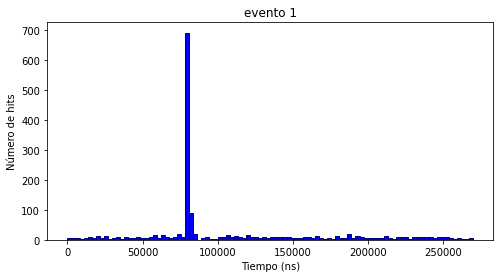

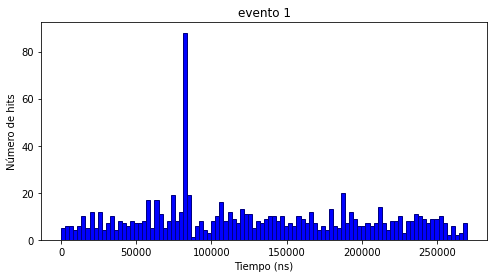

In [29]:
event_number = 1


plt.figure(figsize=(8, 4))
plt.hist(times_branch[event_number], range = [0, 270000], bins = 100,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_2[event_number], range = [0, 270000], bins = 100,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [53]:
threshold_charges = {}
times_branch_modified_chargesTT = []
charge_branch_modified_chargesTT = []

for event in event_number_branch:
    times_input = times_branch_sorted[event].copy()
    charges_input = charge_branch_sorted[event].copy()

    all_thresholds = []
    pass_counter = 0

    while True:
        times_input, charges_input, threshold_charge_event = functions_spills.spill_ChargeTT(charges_input, times_input, 5000)

        if not threshold_charge_event:
            break

        all_thresholds.extend(threshold_charge_event)
        pass_counter += 1  

    if pass_counter > 1:
        print(f"Event {event}: spill_ChargeTT applied {pass_counter} times")

    times_branch_modified_chargesTT.append(times_input)
    charge_branch_modified_chargesTT.append(charges_input)

    if all_thresholds:
        threshold_charges[event] = all_thresholds


Event 84: spill_ChargeTT applied 2 times
Event 89: spill_ChargeTT applied 2 times
Event 103: spill_ChargeTT applied 2 times
Event 277: spill_ChargeTT applied 2 times
Event 323: spill_ChargeTT applied 2 times
Event 533: spill_ChargeTT applied 2 times
Event 846: spill_ChargeTT applied 2 times
Event 1093: spill_ChargeTT applied 2 times


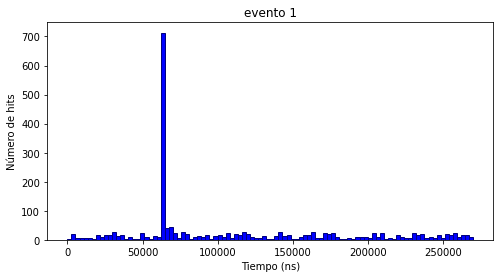

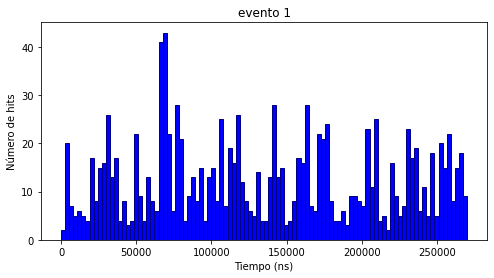

In [56]:
event_number = 1

plt.figure(figsize=(8, 4))
plt.hist(times_branch[event_number], range = [0, 270000], bins = 100,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 100,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [57]:
threshold_times_charged = {}
times_charge_branch_modified = []

for event in event_number_branch:
    remaining_times = times_branch_modified_chargesTT[event].copy()
    all_thresholds = []

    pass_counter = 0  # Count how many times the function is applied

    # Repeat spill_nHitsTT until no more triggers are found
    while True:
        remaining_times, new_triggers = functions_spills.spill_nHitsTT(remaining_times, 5)
        
        if not new_triggers:
            break

        pass_counter += 1
        all_thresholds.extend(new_triggers)

    if pass_counter > 1:
        print(f"Event {event}: spill_nHitsTT applied {pass_counter} times")


    times_charge_branch_modified.append(remaining_times)

    if all_thresholds:
        threshold_times_charged[event] = all_thresholds

Event 58: spill_nHitsTT applied 2 times
Event 138: spill_nHitsTT applied 2 times
Event 157: spill_nHitsTT applied 2 times
Event 160: spill_nHitsTT applied 2 times
Event 173: spill_nHitsTT applied 2 times
Event 206: spill_nHitsTT applied 2 times
Event 221: spill_nHitsTT applied 2 times
Event 234: spill_nHitsTT applied 2 times
Event 248: spill_nHitsTT applied 2 times
Event 297: spill_nHitsTT applied 2 times
Event 355: spill_nHitsTT applied 2 times
Event 379: spill_nHitsTT applied 2 times
Event 383: spill_nHitsTT applied 2 times
Event 386: spill_nHitsTT applied 2 times
Event 400: spill_nHitsTT applied 2 times
Event 425: spill_nHitsTT applied 2 times
Event 443: spill_nHitsTT applied 2 times
Event 493: spill_nHitsTT applied 2 times
Event 499: spill_nHitsTT applied 2 times
Event 519: spill_nHitsTT applied 2 times
Event 540: spill_nHitsTT applied 2 times
Event 541: spill_nHitsTT applied 2 times
Event 565: spill_nHitsTT applied 2 times
Event 603: spill_nHitsTT applied 2 times
Event 612: spill_

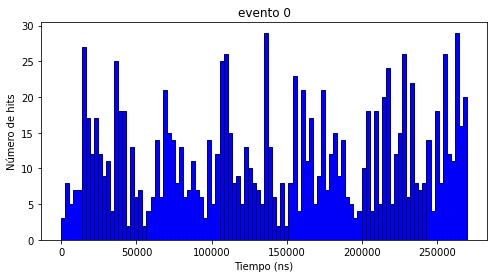

In [59]:
event_number = 0

plt.figure(figsize=(8, 4))
plt.hist(times_charge_branch_modified[event_number], range = [0, 270000], bins = 100,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()